# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
print(f'1. How many rows and columns does the dataset contain: {data.shape}')
print(f'The Column names are the following: {data.columns}')
print(f'2. Are there any Nan Values Present: {data.isna().values.any()}')
print(f'3. Are there any duplicate rows: {data.duplicated().values.any()}')
print(data.info())

1. How many rows and columns does the dataset contain: (5391, 6)
The Column names are the following: Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')
2. Are there any Nan Values Present: False
3. Are there any duplicate rows: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB
None


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [6]:
selected_columns = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for column in selected_columns:
    data[column] = data[column].str.replace('$', '').str.replace(',', '').astype(float)

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [7]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [8]:
print(f'{data.describe()}')
print(f'The lowest film bugeted film was called {data[data['USD_Production_Budget'] == 1100.00].Movie_Title}')
print(f'The highest film budget film was called {data[data['USD_Production_Budget'] == 4.250000e+08].Movie_Title}')

          Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,454,455.00       52,343,687.00  
max     

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [9]:
zero_domestically = data[data['USD_Domestic_Gross'] == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestically)}')
print(f'{zero_domestically.sort_values('USD_Domestic_Gross', ascending=False)}')

Number of films that grossed $0 domestically 512
      Rank Release_Date                     Movie_Title  \
1     5140   1916-05-09                     Intolerance   
6     4630   1927-12-08                           Wings   
4835  5216   2015-02-24                 Give Me Shelter   
4834  5039   2015-02-24                   Irreplaceable   
4833  3697   2015-02-24                     Outside Bet   
...    ...          ...                             ...   
3858  4749   2011-03-06               The Lion of Judah   
3854  3563   2011-02-26                    Ultramarines   
3828  4467   2011-01-04         Fat, Sick & Nearly Dead   
3822  5213   2010-12-31                       Butterfly   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
1                385,907.00                 0.00                0.00  
6              2,000,000.00                 0.00                0.00  
4835             250,000.00  

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [10]:
zero_worldwide = data[data['USD_Worldwide_Gross'] == 0]
print(f'Number of films with that grossed $0 worldwide {len(zero_worldwide)}')
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

Number of films with that grossed $0 worldwide 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00
5058,880,2015-11-12,The Ridiculous 6,"60,000,000.00",0.00,0.00
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,"15,000.00",0.00,0.00
3056,5374,2007-12-31,Tin Can Man,"12,000.00",0.00,0.00
4907,5381,2015-05-19,Family Motocross,"10,000.00",0.00,0.00
5006,5389,2015-09-29,Signed Sealed Delivered,"5,000.00",0.00,0.00


### Filtering on Multiple Conditions

In [12]:
International_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f'Number of internaional releases: {len(International_releases)}')
International_releases

Number of internaional releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [16]:
International_releases_query = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(International_releases_query)}')
International_releases_query.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00
5374,4237,2017-08-25,Polina danser sa vie,"4,000,000.00","36,630.00",0.00


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [20]:
# Date of Data Collection
# Information Needed: 'Release_Date' 
scrape_date = pd.Timestamp('2018-5-1') 
future_releases = data[data['Release_Date'] >= scrape_date]
clean_data = data.drop(future_releases.index)
print(f'The amount of films that are unreleasled are {len(clean_data)}')
print(clean_data)

The amount of films that are unreleasled are 5384
      Rank Release_Date                       Movie_Title  \
0     5293   1915-08-02             The Birth of a Nation   
1     5140   1916-05-09                       Intolerance   
2     5230   1916-12-24      20,000 Leagues Under the Sea   
3     5299   1920-09-17    Over the Hill to the Poorhouse   
4     5222   1925-01-01                    The Big Parade   
...    ...          ...                               ...   
5379  1295   2017-10-02            John Wick: Chapter Two   
5380    70   2017-10-03                Kong: Skull Island   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5382  1254   2017-12-05                          Snatched   
5383  2521   2017-12-31                The Thousand Miles   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
0                110,000.00        11,000,000.00       10,000,000.00  
1                385,907.00                 0.00                0.00  
2   

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [23]:
# Information Needed: USD_Production_Budget > USD_Worldwide_Gross
lost_money = clean_data[clean_data['USD_Production_Budget'] > clean_data['USD_Worldwide_Gross']]
Percentage_of_films = (len(lost_money) / len(clean_data)) * 100
print(f'Answer: {Percentage_of_films}%')


Answer: 37.27711738484398%


# Seaborn for Data Viz: Bubble Charts

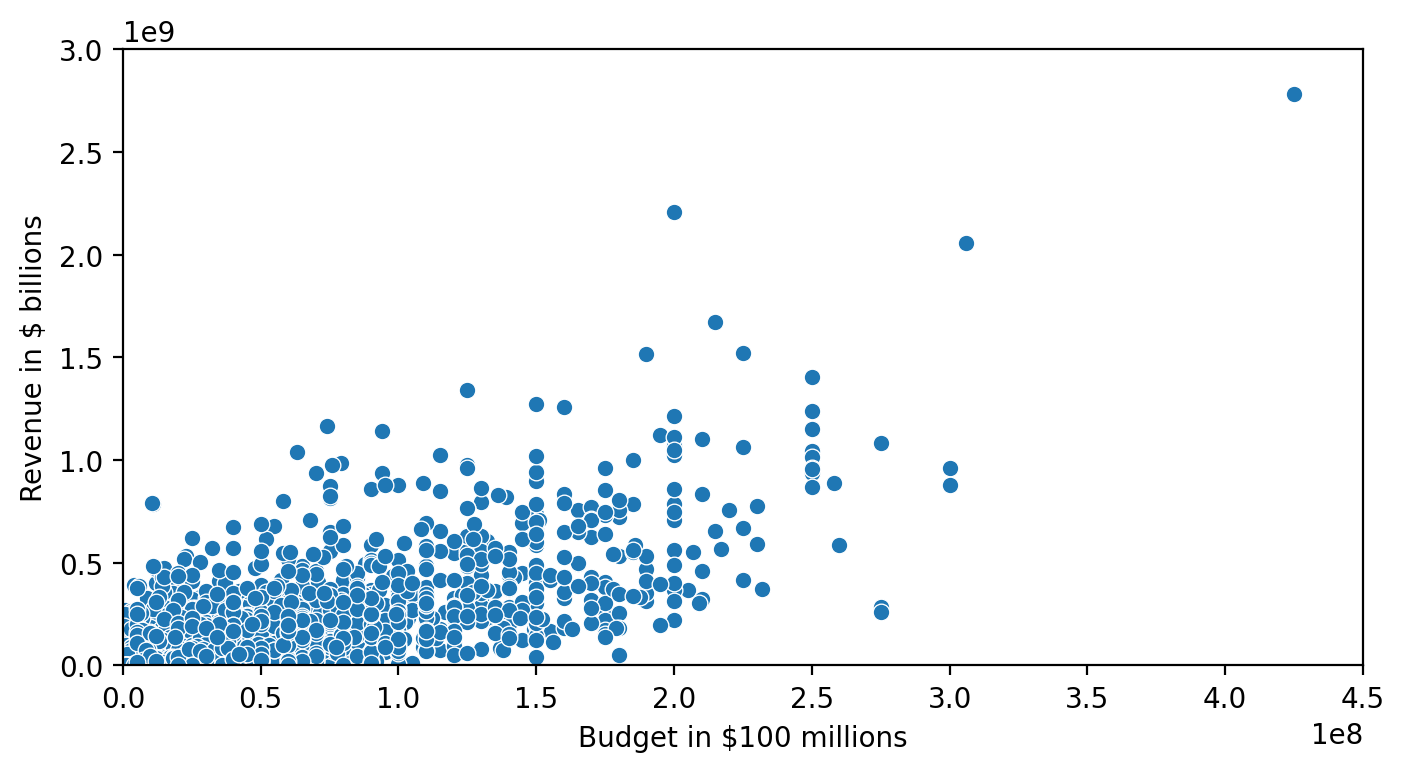

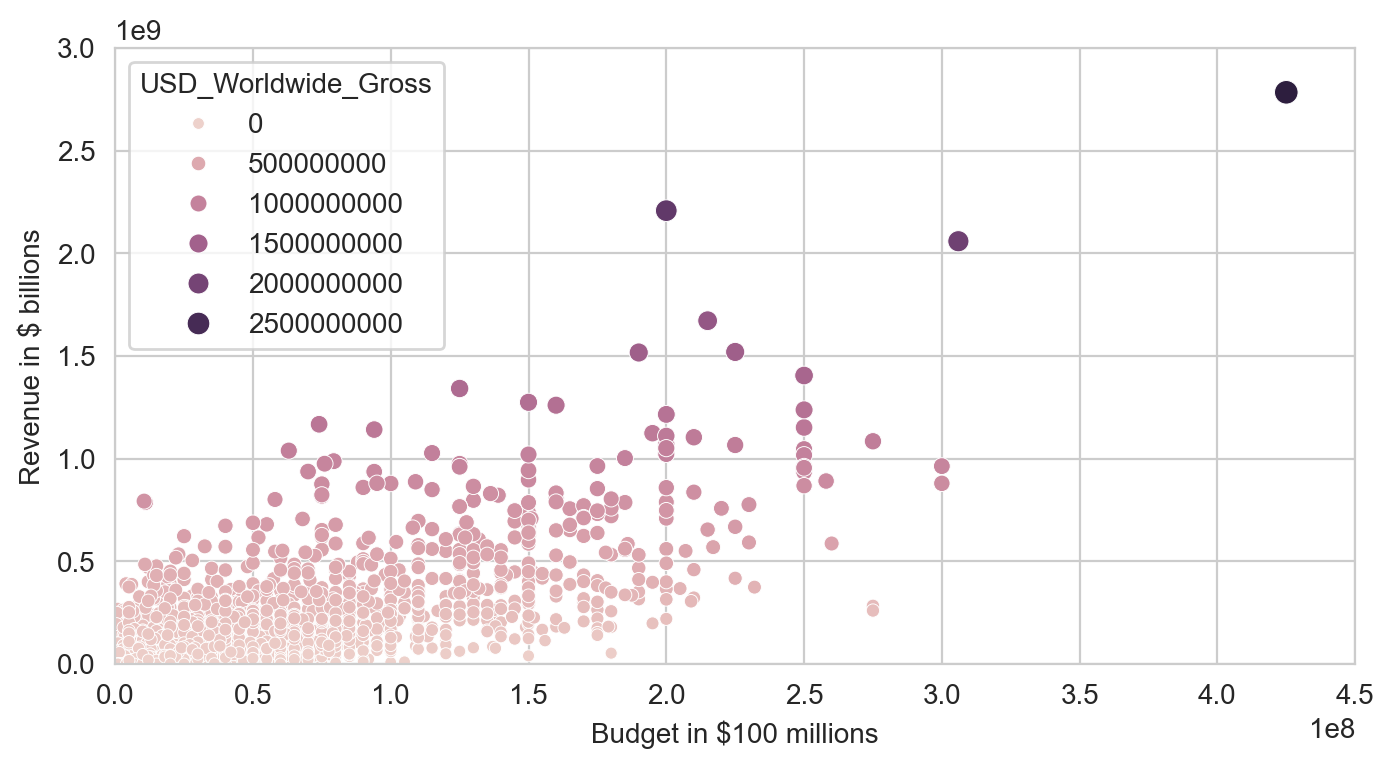

In [38]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=clean_data, x='USD_Production_Budget', y='USD_Worldwide_Gross')
ax.set(ylim = (0, 3000000000), 
       xlim = (0, 450000000), 
       ylabel = 'Revenue in $ billions',
       xlabel = 'Budget in $100 millions')
plt.show()

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):   
       ax = sns.scatterplot(data=clean_data,
                            x='USD_Production_Budget',
                            y='USD_Worldwide_Gross',
                            hue='USD_Worldwide_Gross',
                            size='USD_Worldwide_Gross')
       ax.set(ylim=(0,3000000000),
              xlim=(0, 450000000),
              ylabel='Revenue in $ billions',
              xlabel='Budget in $100 millions',
       )
       plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



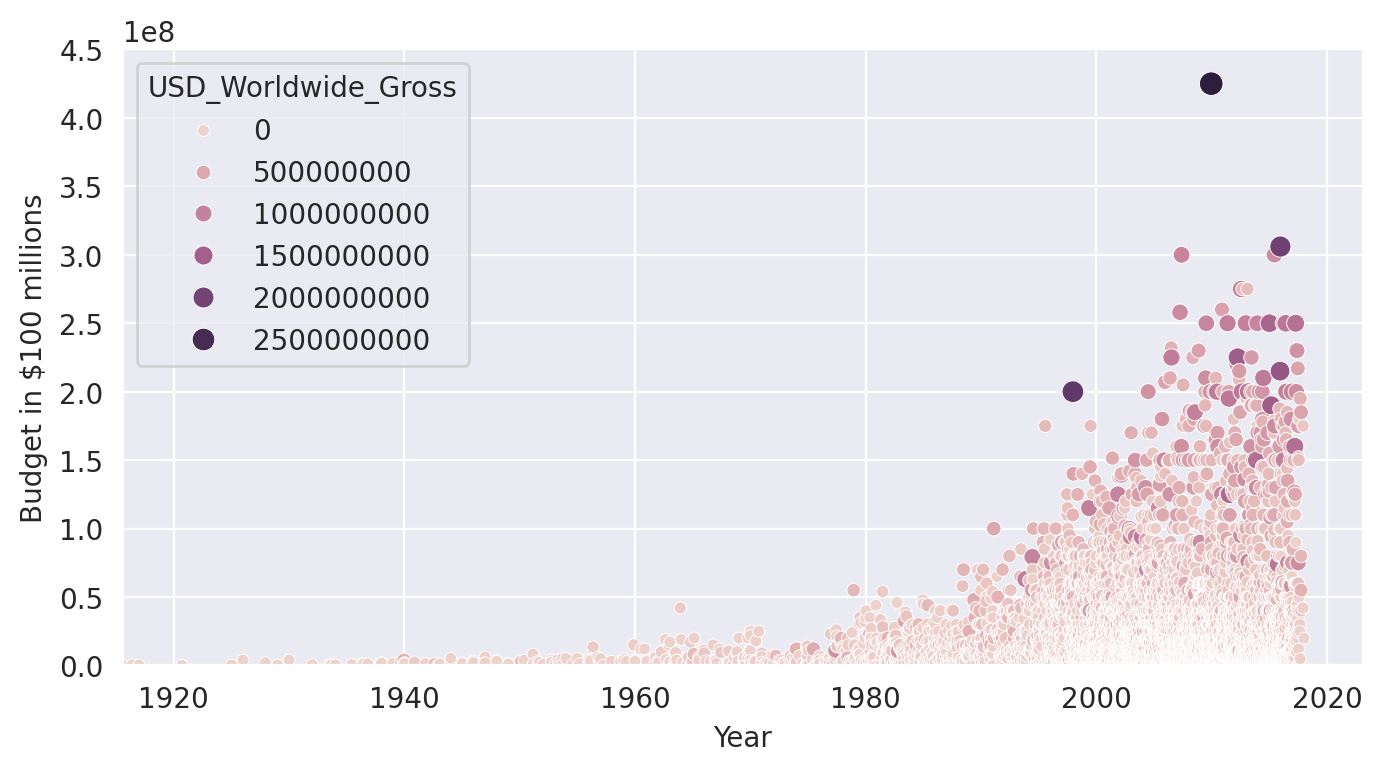

In [50]:
# Information Needed: Release Date, USD_Worldwide_Gross, USD_Production_Budget
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'): 
    ax = sns.scatterplot(
        data=clean_data,
        x='Release_Date', 
        y='USD_Production_Budget',
        hue='USD_Worldwide_Gross',
        size='USD_Worldwide_Gross'
    )

    ax.set(
        xlim=clean_data.Release_Date.min(), # I messed up on this part
        ylim=(0, 450000000), 
        xlabel='Year', 
        ylabel='Budget in $100 millions'
    )

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [61]:
release_date = clean_data.Release_Date.dt.year
release_date = (release_date // 10) * 10
clean_data['Decade'] = release_date


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [64]:
old_films = clean_data[clean_data['Decade'] <= 1960]
new_films = clean_data[clean_data['Decade'] > 1960]
print(f'Films prior to 1970 {len(old_films)}')
print(f'Expensive Film made prior to 1970 {old_films["USD_Production_Budget"].max()}')

Films prior to 1970 153
Expensive Film made prior to 1970 42000000.0


# Seaborn Regression Plots

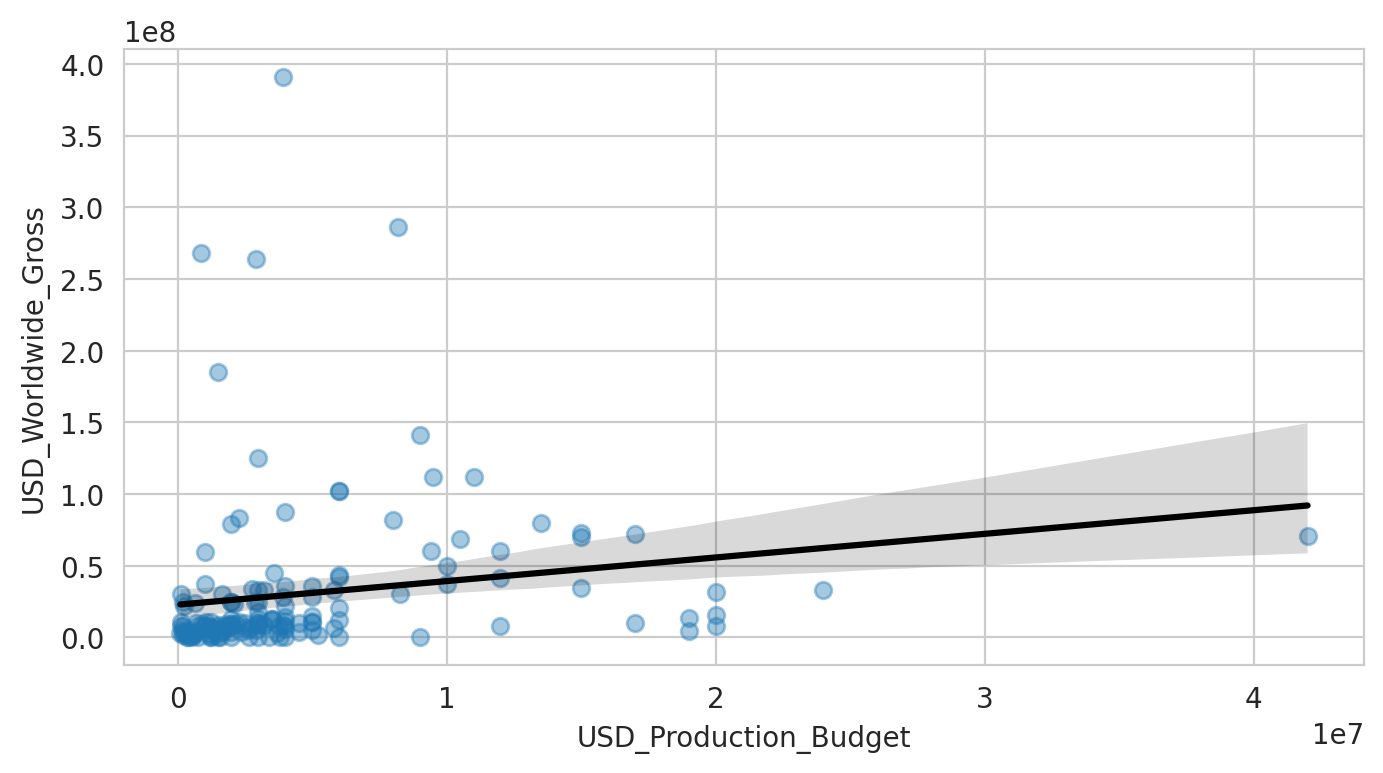

In [66]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
    sns.regplot(
        data=old_films, 
        x='USD_Production_Budget', 
        y='USD_Worldwide_Gross',
        scatter_kws = {'alpha' : 0.4},
        line_kws = {'color' : 'black'} 
    )

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

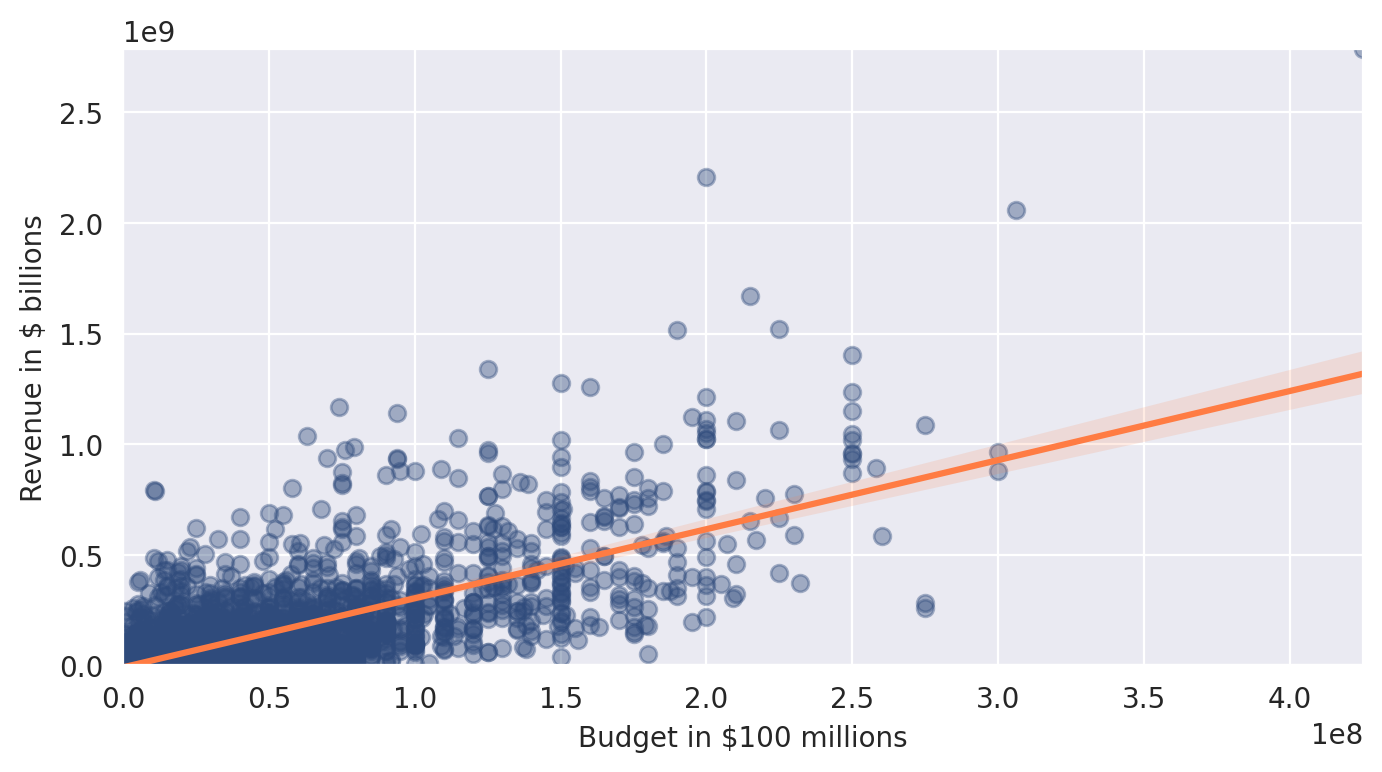

In [72]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'): 
    ax = sns.regplot(
        data=new_films, 
        x='USD_Production_Budget', 
        y='USD_Worldwide_Gross',
        color = '#2f4b7c',
        scatter_kws = {'alpha' : 0.4},
        line_kws = {'color' : '#ff7c43'}
    )

    ax.set(
        xlim=(0,new_films['USD_Production_Budget'].max()), 
        ylim=(0,new_films['USD_Worldwide_Gross'].max()),
        xlabel='Budget in $100 millions', 
        ylabel='Revenue in $ billions'
    )
    

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [88]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
regression.fit(X,y)

# Theta 0 
regression.intercept_

# Theta 1 
regression.coef_

regression.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [86]:
old_regression = LinearRegression()
old_X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
old_Y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
old_regression.fit(old_X, old_Y)

old_regression.intercept_
old_regression.coef_
old_regression.score(old_X, old_Y)


0.02937258620576877

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [89]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.084e+09.
